# Homework 1 for ITS8030
## by Sergei Jegorov 204707 IASM

In [1]:
%pylab inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import hw1
import util


Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 300

In [3]:
songfestival = cv2.imread("images/songfestival.jpg", cv2.IMREAD_COLOR)
cactus = cv2.imread("images/cactus.jpg", cv2.IMREAD_COLOR)
yosemite = cv2.imread("images/yosemite.png", cv2.IMREAD_COLOR)
virgin = cv2.imread("images/virgintrains.jpg", cv2.IMREAD_COLOR)

In [4]:
songfestival = cv2.cvtColor(songfestival, cv2.COLOR_BGR2RGB)
cactus = cv2.cvtColor(cactus, cv2.COLOR_BGR2RGB)
yosemite = cv2.cvtColor(yosemite, cv2.COLOR_BGR2RGB)
virgin = cv2.cvtColor(virgin, cv2.COLOR_BGR2RGB)

In [5]:
songfestival = np.asarray(songfestival,dtype=np.double)
cactus = np.asarray(cactus,dtype=np.double)
yosemite = np.asarray(yosemite,dtype=np.double)
virgin = np.asarray(virgin,dtype=np.double)

## Task 2: Gaussian Blur

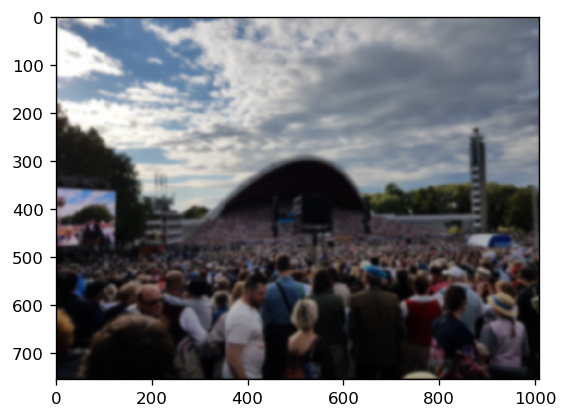

In [6]:
songfestival_blur1 = hw1.gaussian_blur_image(songfestival, 4.0)
util.plotImage(util.img_to_uint8(songfestival_blur1))

In [7]:
cv2.imwrite('task2.png', cv2.cvtColor(util.img_to_uint8(songfestival_blur1), cv2.COLOR_RGB2BGR)) 

True

## Task 3: Separable Gaussian Blur

In [ ]:
## The result is the same as in Task2, but it takes almost double time to compute
## My assumption that it is the result of Python slicing, because when I created a convolution function
## with loops (for calculating result of kernel multiplication) instead of slices, the difference in 
## convolution computation was significantly smaller for separable kernels. However, the same does not apply here.

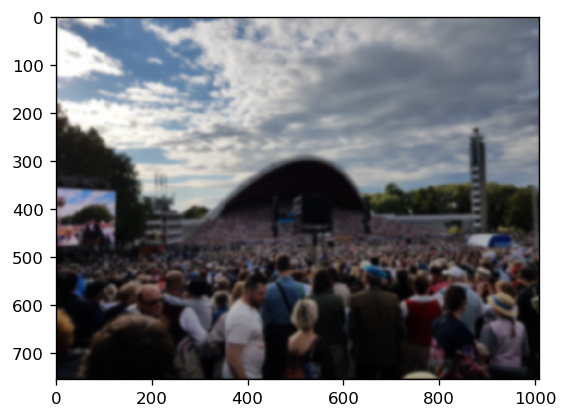

In [8]:
songfestival_blur2 = hw1.separable_gaussian_blur_image(songfestival, 4.0)
util.plotImage(util.img_to_uint8(songfestival_blur2))

In [9]:
cv2.imwrite('task3.png', cv2.cvtColor(util.img_to_uint8(songfestival_blur2), cv2.COLOR_RGB2BGR)) 

True

## Task 4: Image derivatives

In [6]:
c1 = hw1.first_deriv_image_x(cactus, 1.0)

In [7]:
c2 = hw1.first_deriv_image_y(cactus, 1.0)

In [8]:
c3 = hw1.second_deriv_image(cactus, 1.0)

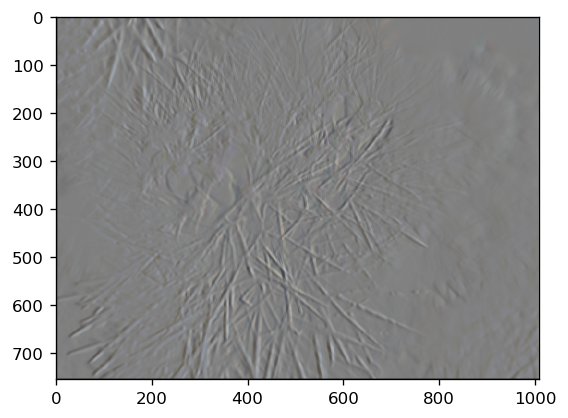

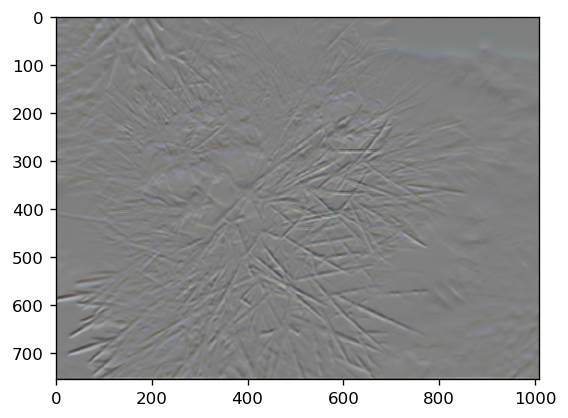

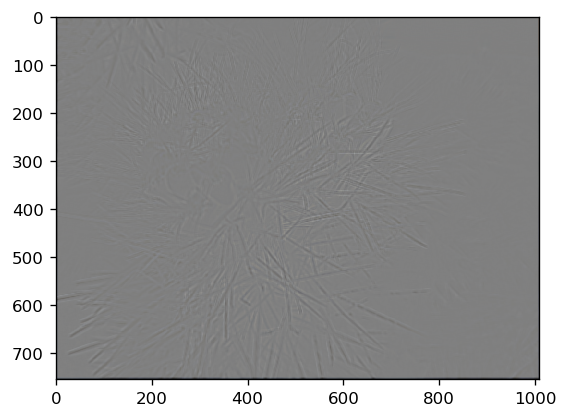

In [9]:
util.plotImage(util.img_to_uint8(c1), "gray")
util.plotImage(util.img_to_uint8(c2), "gray")
util.plotImage(util.img_to_uint8(c3), "gray")

In [10]:
cv2.imwrite('task4a.png', cv2.cvtColor(util.img_to_uint8(c1), cv2.COLOR_RGB2BGR))
cv2.imwrite('task4b.png', cv2.cvtColor(util.img_to_uint8(c2), cv2.COLOR_RGB2BGR)) 
cv2.imwrite('task4c.png', cv2.cvtColor(util.img_to_uint8(c3), cv2.COLOR_RGB2BGR)) 

True

## Task 5: Image sharpening

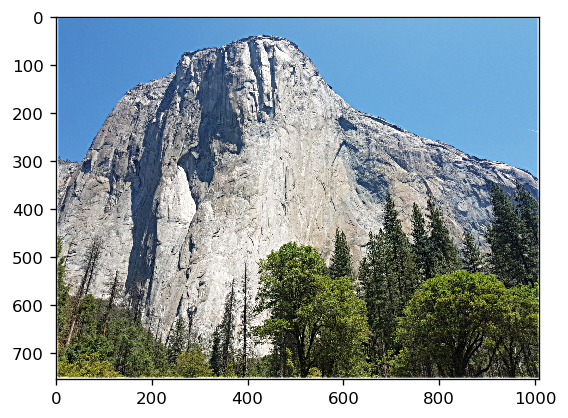

In [11]:
sharpened = hw1.sharpen_image(yosemite, 1.0, 5.0)
util.plotImage(util.img_to_uint8(sharpened))

In [12]:
cv2.imwrite('task5.png', cv2.cvtColor(util.img_to_uint8(sharpened), cv2.COLOR_RGB2BGR)) 

True

## Task 6: Edge detection

In [ ]:
## Here, 2 pictures are saved instead of one: task6.png and task6_colormap.png 
## which displays the orientation of edges. Below is the colormap legend explains which color corresponds
## to which orientation. The threshold is set to 7 for the colormap.

In [14]:
cactus_gray = cv2.cvtColor(util.img_to_uint8(cactus), cv2.COLOR_BGR2GRAY)
cactus_gray = util.img_to_double(cactus_gray)

In [15]:
mag, orient = hw1.sobel_image(cactus_gray)

In [17]:
orient = util.rad2deg(orient)
cmap = util.createColorMap(mag, orient, threshold = 7)

In [ ]:
## Color map as follows:
'''
RED for theta < 90 deg
CYAN for 90 deg < theta < 180 deg
GREEN for 180 deg < theta < 270 deg
Yellow for 270 deg < theta < 360 deg
'''

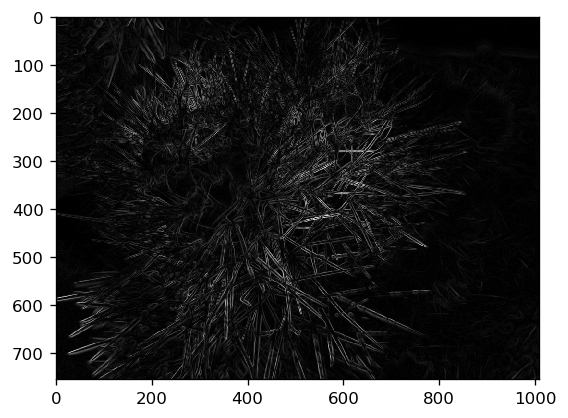

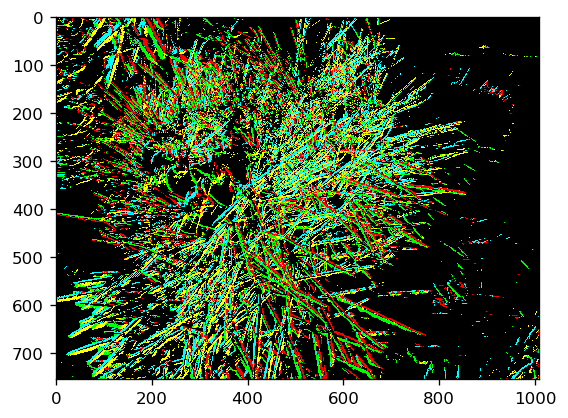

In [18]:
util.plotImage(util.img_to_uint8(mag), "gray")
util.plotImage(util.img_to_uint8(cmap))

In [19]:
cv2.imwrite('task6.png', cv2.cvtColor(util.img_to_uint8(mag), cv2.COLOR_RGB2BGR))
cv2.imwrite('task6_colormap.png', cv2.cvtColor(util.img_to_uint8(cmap), cv2.COLOR_RGB2BGR)) 

True

## Task 7: Bilinear Interpolation

In [ ]:
'''
Here, because the given function rotate_image (or rotate_image_fast) does not take into account the blank spaces,
the pixels in the top left and top right corners were still computated, even though those places should 
be technically blank
'''

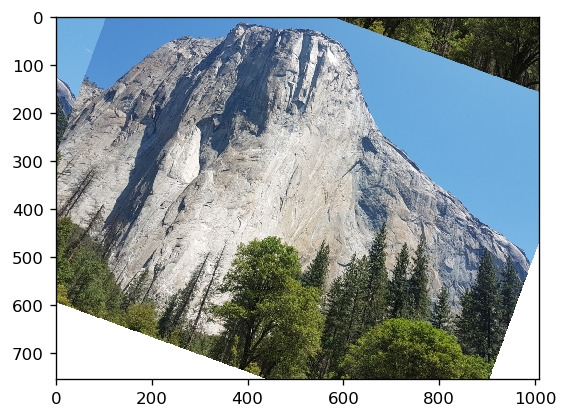

In [21]:
rotated = hw1.rotate_image_fast(hw1.bilinear_interpolation,yosemite, 20)
util.plotImage(util.img_to_uint8(rotated))

In [22]:
cv2.imwrite('task7.png', cv2.cvtColor(util.img_to_uint8(rotated), cv2.COLOR_RGB2BGR)) 

True

## Task 8: Finding Peak Edges

In [23]:
virgin_gray = cv2.cvtColor(util.img_to_uint8(virgin), cv2.COLOR_BGR2GRAY)
virgin_gray = util.img_to_double(virgin_gray)

In [27]:
virgin_peaks = hw1.find_peaks_image(virgin_gray, 40.0)

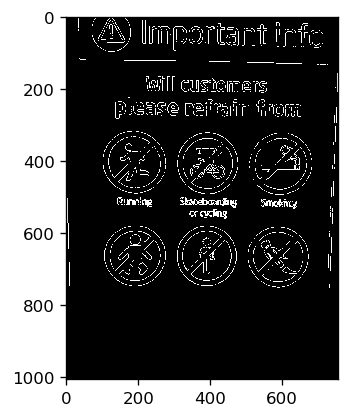

In [28]:
util.plotImage(util.img_to_uint8(virgin_peaks), "gray")

In [29]:
cv2.imwrite('task8.png', cv2.cvtColor(util.img_to_uint8(virgin_peaks), cv2.COLOR_RGB2BGR)) 

True